# Procesamiento de datos utilizando python

##### `Procesamiento numérico`  


>`> Extracción de datos`

In [1]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [2]:
pd.set_option("display.max_rows",6)
pd.set_option("display.max_columns",13)

`vistaexaminados y vistaasistencias`

In [3]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')

In [20]:

dfAsis#dfAsis.head()#dataframes de "vistaasistencias"

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
2,2023-01-19,DIBA-I,Facultad de Informática y Ciencias Aplicadas,CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS,DIBUJO APLICADO,2,06:30-08:00,Ma-Jue,26,17,EN LINEA
...,...,...,...,...,...,...,...,...,...,...,...
9377,2023-03-07,ING1-H,Facultad de Ciencias Sociales,IDIOMAS,INGLÉS I,5,08:00-09:30,Ma-Jue,81,-1,PRESENCIAL
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Limpieza de datos`

`vistaasistencias`

In [21]:
dfAsis.info()#sin valores nulos cantidad de registros son 9380 @ columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       9380 non-null   object
 1   codigo      9380 non-null   object
 2   facultad    9380 non-null   object
 3   area        9380 non-null   object
 4   materia     9380 non-null   object
 5   seccion     9380 non-null   int64 
 6   horario     9380 non-null   object
 7   dias        9380 non-null   object
 8   Inscritos   9380 non-null   int64 
 9   Asistencia  9380 non-null   int64 
 10  Modalidad   9380 non-null   object
dtypes: int64(3), object(8)
memory usage: 806.2+ KB


>`> Transformación de datos`

In [6]:
# transExam=dfExam.area
# list(transExam.drop_duplicates())
#evaluacion, tipo,examinados, asistencia

`vistaasistencias`

In [7]:
transAsis=dfAsis.columns
transAsis#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad'],
      dtype='object')

In [8]:
# utilizando el método rename para cambiar el nombre de las columnas
dfAsis.rename(columns={"Inscritos": "inscritos","Asistencia": "asistencia","Modalidad": "modalidad"}, inplace=True)
# imprime los nombres de las columnas actualizadas
print(dfAsis.columns)

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'inscritos', 'asistencia', 'modalidad'],
      dtype='object')


In [9]:
transAsis=dfAsis.facultad
list(transAsis.drop_duplicates())#virificando registros unicos

['Facultad de Derecho',
 'Facultad de Informática y Ciencias Aplicadas',
 'Facultad de Ciencias Empresariales',
 'Facultad de Ciencias Sociales']

In [10]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }
# utilizando el método replace para cambiar los nombres de los registros
dfAsis["facultad"] = dfAsis["facultad"].replace(mapeo_Fac)

# mostrar la columna actualizada
print(dfAsis["facultad"])

0        Fac_Der
1       Fac_InCa
2       Fac_InCa
          ...   
9377    Fac_CiSo
9378    Fac_CiSo
9379    Fac_InCa
Name: facultad, Length: 9380, dtype: object


In [11]:
# dfExam['facultad']# comprobando datos en las columnas
# dfAsis['facultad']# comprobando datos en las columnas

>`> Estadísticas generadas`

`vistaasistencias`

#### 1- ¿Comportamiento de la asistencia de los estudiantes en las facultades?
#### 2- ¿Cuál es la relación entre la asistencia y el número de estudiantes inscritos en cada materia?

>`> Presentación de resultados` 

`vistaasistencias`

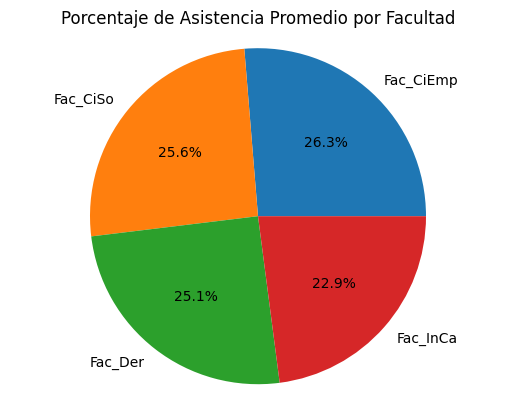

In [12]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['asistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

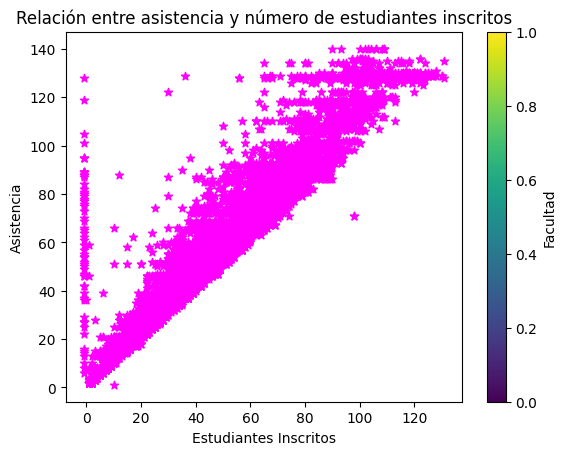

In [13]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],color=colors[4],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

> ### `EXPORTACIÓN DE DATOS`

In [5]:
#dfExam.to_csv('exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfAsis.to_csv('Asis_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfExam.to_csv('Exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD